# 데이터 분석 배워보기

데이터 분석이란 데이터를 불러와 수정, 가공한 후 분석을 통해 통찰력을 얻고 답을 찾아나가는 과정이다. 

우리가 실제 다루는 대부분의 데이터는 행과 열로 이루어진 테이블 형태이다. pandas 패키지는 1차원 배열인 시리즈(Series) 및 행과 열로 이루어진 2차원 배열인 데이터프레임(DataFrame)을 통해 데이터 분석 업무를 쉽게 처리할 수 있게 해준다. 이번 장에서는 pandas 패키지를 이용한 데이터 분석 방법에 대해 살펴보도록 하자.

## 시리즈

시리즈란 데이터가 순차적으로 나열된 1차원 배열이며, 구조는 {numref}`series`와 같다. 인덱스(Index)와 값(Value)은 일대일 대응 관계이며, 이는 키(key)와 값(value)이 '{key:value}' 형태로 구성된 딕셔너리와 비슷하다.

```{figure} image/eda/series.png
---
name: series
---
시리즈 구조
```

### 시리즈 만들기

시리즈는 `Series()` 함수를 통해 만들 수 있다. 먼저 딕셔너리를 이용해 시리즈를 만드는 법을 살펴보자.

In [96]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl (11.6 MB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.12.1 requires matplotlib!=3.6.1,>=3.1, which is not installed.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
import pandas as pd

dict_data = {'a': 1, 'b': 2, 'c': 3}
series = pd.Series(dict_data)

print(series)

a    1
b    2
c    3
dtype: int64


In [98]:
dict_data

{'a': 1, 'b': 2, 'c': 3}

In [99]:
type(series)

pandas.core.series.Series

먼저 키가 'a', 'b', 'c', 값이 1, 2, 3인 딕셔너리를 만든 후, `Series()` 함수에 입력하면 시리즈 객체로 변환된다. 결과를 살펴보면 딕셔너리의 키는 시리즈의 인덱스로, 딕셔너리의 값들은 시리즈의 값으로 변환되었다.

In [102]:
series.index

Index(['a', 'b', 'c'], dtype='object')

시리즈 뒤에 `.index`와 `.values`를 입력하면 각각 인덱스와 값의 배열을 반환한다. 

딕셔너리가 아닌 리스트를 통해 시리즈를 만들 수도 있다.

In [111]:
list_data = ['a', 'b', 'c']
series_2 = pd.Series(list_data)

print(series_2)

0    a
1    b
2    c
dtype: object


만일 리스트를 통해 시리즈를 만들 경우, 인덱스는 정수형 위치 인덱스(0, 1, 2, ...)가 자동으로 지정된다. 

In [112]:
 help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool | None' = None, fastpath: 'bool | lib.NoDefault' = <no_default>) -> 'None'
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, \*, \*\*) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar

In [6]:
series_3 = pd.Series(list_data, index=['index1', 'index2', 'index3'])

print(series_3)

index1    a
index2    b
index3    c
dtype: object


리스트를 통해 시리즈를 만든 후, index 옵션에 인덱스 이름을 직접 입력하여 인덱스를 생성할 수도 있다.

###  원소 선택하기

시리즈도 리스트 혹은 튜플과 같이 인덱싱이나 슬라이싱를 사용해 원하는 원소를 선택할 수 있다.

In [113]:
c_data = {'Korea': 'Seoul',
                     'Japan': 'Tokyo',
                     'China': 'Beijing',
                     'India': 'New Delhi',
                     'Taiwan': 'Taipei',
                     'Singapore': 'Singapore'
                     }
capital = pd.Series(c_data)

print(capital)

Korea            Seoul
Japan            Tokyo
China          Beijing
India        New Delhi
Taiwan          Taipei
Singapore    Singapore
dtype: object


먼저 키로는 국가명, 값으로는 수도로 이루어진 시리즈를 만들었다. 이 중 한국에 해당하는 데이터를 선택하는 법은 다음과 같다.

In [119]:
capital['Taiwan']

'Taipei'

딕셔너리에서 키 값을 입력하면 이에 해당하는 값이 선택된 것처럼, 시리즈에서는 인덱스 이름을 입력하면 이에 해당하는 값이 선택된다.

In [120]:
capital[['Korea', 'Taiwan']]

Korea      Seoul
Taiwan    Taipei
dtype: object

시리즈의 특징 중 하나는 한번에 여러개의 인덱스를 입력할 수 있다는 점이다. 값을 찾고 싶은 인덱스를 리스트 형태로([ ]) 입력하면 이에 해당하는 모든 원소가 선택된다.

In [121]:
capital[0]

C:\Users\masta\AppData\Local\Temp\ipykernel_21300\3861522677.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  capital[0]


'Seoul'

시리즈는 순서가 있기 때문에 위치를 통해서도 원하는 값을 선택할 수 있다. 위치 인덱스 0을 입력하면, 이에 해당하는 첫 번째 값인 Seoul이 선택된다.

In [122]:
capital[[0, 3]]

C:\Users\masta\AppData\Local\Temp\ipykernel_21300\1449061399.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  capital[[0, 3]]


Korea        Seoul
India    New Delhi
dtype: object

위치 인덱스를 리스트 형태로 입력하면, 역시나 이에 해당하는 원소가 출력된다.

In [123]:
capital[0:3]

Korea      Seoul
Japan      Tokyo
China    Beijing
dtype: object

In [124]:
capital['Korea':'Taiwan']

Korea         Seoul
Japan         Tokyo
China       Beijing
India     New Delhi
Taiwan       Taipei
dtype: object

리스트와 동일하게 슬라이싱 기능 역시 사용이 가능하다. `0:3`은 위치 인덱스가 0 이상 3 미만을 뜻하며 이에 해당하는 값이 선택된다.

### 시리즈 연산하기

시리즈는 사칙 연산이 가능하다.

In [125]:
series_1 = pd.Series([1, 2, 3])
series_2 = pd.Series([4, 5, 6])

series_1 + series_2

0    5
1    7
2    9
dtype: int64

먼저 1,2,3으로 이루어진 시리즈(series_1)와 4,5,6으로 이루어진 시리즈(series_2)를 생성한다. 그 후 두 시리즈를 더하면 각각의 인덱스가 같은 값끼리 연산이 수행된다. 즉 1+4, 2+5, 3+6의 결과인 5, 7, 9가 계산된다.

In [126]:
series_1 

0    1
1    2
2    3
dtype: int64

In [127]:
series_2

0    4
1    5
2    6
dtype: int64

In [128]:
series_1 * 2

0    2
1    4
2    6
dtype: int64

시리즈에 숫자를 연산하면 모든 원소에 연산이 적용된다. 즉 시리즈에 2을 곱하면 모든 원소에 2가 곱해져 1\*2, 2\*2, 3\*3의 결과인 2,4,6이 계산된다. 

## 데이터프레임

시리즈가 1차원 배열이였다면, 데이터프레임은 2차원 배열이다. 이는 흔히 엑셀에서 사용하는 행과 열로 이루어진 테이블 형태이다. 데이터프레임의 각 열은 시리즈 객체이며, 이러한 시리즈가 모여 데이터프레임을 구성한다.

```{figure} image/eda/dataframe.png
---
name: dataframe
---
데이터프레임 구조
```

### 데이터프레임 만들기와 수정하기

데이터프레임은 `DataFrame()` 함수를 통해 만들 수 있으며, 시리즈를 만드는 방법과 유사하다.

In [130]:
dict_data = {'col1': [1, 2, 3], 'col2': [4, 5, 6], 'col3': [7, 8, 9]}
df = pd.DataFrame(dict_data)

df

,col1,col2,col3
0,1,4,7
1,2,5,8
2,3,6,9


In [16]:
type(df)

pandas.core.frame.DataFrame

데이터프레임을 만들기 위해서는 길이가 같은, 즉 원소의 개수가 동일한 1차원 배열이 여러개 필요한다. 이는 데이터프레임이 여러 개의 시리즈를 모아둔 것과 같기 때문이다. 먼저 키가 'col1', 'col2', 'col3'이며 각 쌍에는 값이 3개씩 들어가있는 딕셔너리를 만든다. 이를 `DataFrame()` 함수에 넣으면 딕셔너리의 키는 열이름이 되며, 딕셔너리의 값은 데이터프레임 열의 값이 된다.

In [ ]:
import pandas as pd


In [17]:
df2 = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

df2

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


리스트를 통해 데이터프레임을 만들수도 있다. `DataFrame()` 함수 내부에 리스트 형태인 [1, 2, 3], [4, 5, 6], [7, 8, 9]를 다시 리스트에 넣어 중첩 형태로 입력하면, 각각의 리스트가 그대로 행의 형태로 입력된다. 반면 행 인덱스와 열 이름은 기본값인 위치 인덱스가 부여된다.

In [132]:
cols = ['col1', 'col2', 'col3']
idxs = ['index1', 'index2', 'index3']

df3 = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]],
                   index=idxs,
                   columns=cols)

df3

,col1,col2,col3
index1,1,2,3
index2,4,5,6
index3,7,8,9


만일 행 인덱스와 열 이름을 직접 지정하고자 할 경우, 리스트 형태로 입력하면 된다. 기존 데이터프레임의 행 인덱스와 열 이름도 변경할 수 있다.

In [134]:
df3.index = ['행 1', '행 2', '행 3']
df3.columns = ['1', '2', '3']

df3

,1,2,3
행 1,1,2,3
행 2,4,5,6
행 3,7,8,9


`DataFrame.index`와 `DataFrame.columns`를 통해 각각 새로운 행 인덱스 및 열 이름을 입력하면 이에 맞게 데이터가 바뀐다.

In [139]:
df3.rename(index={'두 번째 행': '행2'}, inplace=True)
df3.rename(columns={'2': '두 번째 열'}, inplace=True)

df3

,1,두 번째 열,3
행 1,1,2,3
행2,4,5,6
행 3,7,8,9


행 인덱스나 열 이름 중 원하는 부분만을 선택해 변경할 수도 있다. `DataFrame.rename(index or columns = {기존 이름:새 이름, ...})`을 입력하여 기존의 이름을 새 이름으로 변경할 수 있으며, `inplace = True` 옵션을 사용하면 원본 데이터가 변경된다.

이번에는 데이터프레임의 행과 열을 삭제하는 방법에 대해 살펴보자.

In [142]:
df3

,1,두 번째 열,3
행 1,1,2,3
행2,4,5,6


In [144]:
# df3.drop('행2', axis=0, inplace=True)
df3.drop('두 번째 열', axis=1, inplace=True)

df3

,1,3
행 1,1,3


`drop()` 메서드는 행 혹은 열을 삭제한다. 삭제하고 싶은 행 인덱스 혹은 열 이름을 입력하면 해당 부분이 삭제되며, 행을 삭제할 때는 축(axis) 옵션으로 `axis = 0`을, 열을 삭제할 때는 `axis = 1`을 입력해야 한다. 마지막으로 `inplace = True` 옵션을 사용하면 원본 데이터가 변경된다.

- 행 삭제: `DataFrame.drop(행 인덱스, axis=0, inplace=True)`
- 열 삭제: `DataFrame.drop(열 이름, axis=1, inplace=True)`

### 열과 행 선택하기

먼저 데이터프레임에서 열을 선택하는 법에 대해 알아보도록 하자. 열을 하나만 선택할 때는 대괄호([ ])안에 열 이름을 따옴표와 함께 입력거나, 도트(.) 다음에 열 이름을 입력하면 된다.

- `DataFrame['열 이름']`
- `DataFrame.열 이름` (열 이름이 문자열인 경우에만 가능)

먼저 샘플 데이터프레임을 만들어 보자.

In [146]:
dict_data = {'col1': [1, 2, 3, 4], 'col2': [5, 6, 7, 8],
             'col3': [9, 10, 11, 12], 'col4': [13, 14, 15, 16]}
df = pd.DataFrame(dict_data, index=['index1', 'index2', 'index3', 'index4'])

df

,col1,col2,col3,col4
index1,1,5,9,13
index2,2,6,10,14
index3,3,7,11,15
index4,4,8,12,16


이 중 첫번째 열인 'col1'을 선택하는 법은 다음과 같다.

In [148]:
type(df['col1'])

pandas.core.series.Series

In [156]:
df['col1'].shape

(4,)

In [25]:
type(df['col1'])

pandas.core.series.Series

`DataFrame['col1']`과  `DataFrame.col1` 모두 동일한 데이터가 선택된다. 열을 한개만 선택할 경우 시리즈 객체가 반환되며, 만일 데이터프레임 형태로 반환하고자 할 경우에는 2중 대괄호([[열 이름]]) 형태로 입력하면 된다.

In [154]:
df[['col1']].shape

(4, 1)

In [151]:
type(df[['col1']])

pandas.core.frame.DataFrame

이번에는 데이터프레임에서 2개 이상의 열을 추출하는 법에 대해 알아보자. 대괄호([ ]) 안에 열 이름을 리스트 형태로 입력하면 이에 해당하는 열들이 데이터프레임으로 반환된다. 

- `DataFrame[['열 이름 1', '열 이름 2', ..., '열 이름 n']]`

위 예제에서 col1과 col2 열을 선택해보도록 하자.

In [153]:
df[['col1', 'col2']]

,col1,col2
index1,1,5
index2,2,6
index3,3,7
index4,4,8


이번에는 원하는 행을 선택하는 법에 대해 알아보자. 파이썬에서는 행 데이터를 선택할 때 `loc`과 `iloc` 인덱서를 사용한다. `loc`은 인덱스 이름을 기준으로 행을 선택할 때, `iloc`은 위치 인덱스를 기준으로 행을 선택할 때 사용한다.

- `DataFrame.loc['행 인덱스']`
- `DataFrame.iloc[위치 인덱스]`

먼저 첫번째 행을 선택하는 법에 대해 살펴보자.

In [162]:
df

,col1,col2,col3,col4
index1,1,5,9,13
index2,2,6,10,14
index3,3,7,11,15
index4,4,8,12,16


In [166]:
df.loc['index2','col4']

14

In [31]:
type(df.loc['index1'])

pandas.core.series.Series

`loc` 인덱서를 사용할 경우 인덱스 이름인 'index1'을 입력하였으며, `iloc` 인덱서를 사용할 경우는 위치 인덱스인 0을 입력했다. 행을 한개만 선택할 때에도 시리즈 객체가 반환되며, 2중 대괄호([[ 열 이름]])를 사용하면 데이터프레임 형태가 반환된다.

In [32]:
df.loc[['index1']]

,col1,col2,col3,col4
index1,1,5,9,13


In [33]:
df.iloc[[0]]

,col1,col2,col3,col4
index1,1,5,9,13


인덱서를 사용할 경우 슬라이싱 기능도 사용할 수 있다. 

In [167]:
df.loc['index1':'index3','col2':'col3' ]

,col2,col3
index1,5,9
index2,6,10
index3,7,11


In [168]:
df.iloc[0:2,1:3]

,col2,col3
index1,5,9
index2,6,10


행 인덱스 'index1'의 위치 인덱스는 0, 'index3'의 위치 인덱스는 2임에도 불구하고 `loc`과 `iloc`의 결과가 다르다. 이는 `loc`의 경우 범위의 끝을 포함하는 반면, `iloc`의 경우 범위의 끝을 제외하기 때문이다. 이를 정리하면 다음과 같다.

{table} 인덱서의 비교
:name: indexor
| 구분 | `loc` | `iloc` |
| --- | --- | --- |
| 대상 | 인덱스 이름 | 위치 인덱스 |
| 범위 | 범위의 끝 포함 | 범위의 끝 제외 |


마지막으로 행과 열을 동시에 입력하여 원하는 원소를 선택하는 법을 살펴보도록 하자. 각 인덱서를 사용하는 법의 차이는 다음과 같다.

- `DataFrame.loc['행 인덱스', '열 이름']`
- `DataFrame.iloc[행 위치, 열 위치]`

먼저 `loc` 인덱서를 사용한 방법을 살펴보자.

In [36]:
df.loc['index1', 'col1']

1

`loc` 인덱서를 통해 행 인덱스가 'index1', 열 이름이 'col1'인 원소가 선택되었다. 하나가 아닌 여러 원소를 선택하는 것도 가능하다.

In [37]:
df.loc[['index1', 'index3'], ['col1', 'col4']]

,col1,col4
index1,1,13
index3,3,15


리스트 형태로 원하는 행 인덱스 및 열 이름들을 입력하면, 해당 부분의 데이터만 선택하여 출력된다. 즉 행 인덱스가 'index1'과 'index3'인 행에서 열 이름이 'col1'과 'col4'인 열이 선택된다.

슬라이싱을 이용해서도 원소를 선택할 수 있다.

In [38]:
df.loc['index1':'index2', 'col1':'col3']

,col1,col2,col3
index1,1,5,9
index2,2,6,10


행 인덱스가 'index1'부터 'index2'까지의 행이, 열 이름이 'col1'부터 'col3' 까지의 열이 선택되었다.

`iloc` 인덱서를 사용한 방법도 살펴보자.

In [39]:
df.iloc[0, 0]

1

`iloc` 인덱서를 통해 첫 번째 행, 첫 번째 열의 원소가 선택되었다.

In [40]:
df.iloc[[0, 2], [0, 3]]

,col1,col4
index1,1,13
index3,3,15


각 행과 열의 위치를 리스트 형태로 넣으면 해당 부분의 원소가 선택된다.

In [41]:
df.iloc[0:2, 0:3]

,col1,col2,col3
index1,1,5,9
index2,2,6,10


슬라이싱 기법으로도 원소를 선택할 수 있으며, `loc` 인덱서의 경우 범위의 끝이 포함되지만 `iloc` 인덱서는 범위의 끝이 포함되지 않는다.

## 데이터 불러오기 및 저장하기

데이터 분석에서 가장 첫 단계는 외부에 저장된 데이터를 프로그램으로 불러오는 일이다. 데이터가 없다면 분석도 할 수 없기 때문이다. pandas의 함수를 사용하면 다양한 형태의 파일을 불러와 데이터프레임으로 변환할 수 있으며, 반대로 가공한 데이터프레임을 다양한 유형의 파일로 저장할 수도 있다.

-  판다스의 데이터 입출력 함수
:name: read_data
| 파일 포맷 | 불러오기 | 저장하기 |
| --- | --- | --- |
| CSV | `read_csv()` | `to_csv()` |
| EXCEL | `read_excel()` | `to_excel()` |
| SQL | `read_sql()` | `to_sql()` |
| HTML | `read_html()` | `to_html()` |
| JSON | `read_json()` | `to_json()` |
| HDF5 | `read_hdf()` | `to_hdf()` |


이 중 가장 대표적인 파일 포맷인 CSV와 EXCEL 파일을 읽고 쓰는 법에 대해 살펴보기로 하자.

In [169]:
import pandas as pd

data_csv = pd.read_csv(
    'https://raw.githubusercontent.com/hyunyulhenry/quant_py/main/kospi.csv')
data_csv

,Date,Close,Ret
0,2020-01-02,2175.17,-1.02
1,2020-01-03,2176.46,0.06
2,2020-01-06,2155.07,-0.98
3,2020-01-07,2175.54,0.95
4,2020-01-08,2151.31,-1.11
...,...,...,...
243,2020-12-23,2759.82,0.96
244,2020-12-24,2806.86,1.70
245,2020-12-28,2808.60,0.06
246,2020-12-29,2820.51,0.42


`read_csv()` 함수 내에 파일 경로(파일명)을 입력하면 CSV 파일을 불러온 후 데이터프레임으로 변환한다. 파일 경로는 PC에서의 파일 위치(예: C:\Users\leebi\quant\kospi.csv) 혹은 인터넷 주소를 입력하면 된다. 해당 함수는 다양한 인자를 제공하므로 원하는 형식에 맞춰 데이터를 불러오는 것이 가능하다. 이와 관련된 자세한 설명은 아래 페이지에 설명되어 있다.

```
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
```

데이터를 불러온 것과 반대로 파이썬의 데이터프레임을 CSV 파일로 저장할때는 `to_csv()` 메서드가 사용된다.

In [170]:
data_csv.to_csv('data.csv')

```{figure} image/eda/save_csv.png
---
name: save_csv
---
```

`DataFrame.to_csv('파일이름.csv')`을 입력하면 해당 경로에 CSV 파일이 저장된다. 

이번에는 엑셀 파일을 불러오는 법을 살펴보도록 하자. 

```terminal
pip install openpyxl
```

In [171]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
  Using cached openpyxl-3.1.3-py2.py3-none-any.whl (251 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [172]:
data_excel = pd.read_excel(
    'https://github.com/hyunyulhenry/quant_py/raw/main/kospi.xlsx', sheet_name='kospi')
data_excel

,Date,Close,Ret
0,2020-01-02,2175.17,-1.02
1,2020-01-03,2176.46,0.06
2,2020-01-06,2155.07,-0.98
3,2020-01-07,2175.54,0.95
4,2020-01-08,2151.31,-1.11
...,...,...,...
243,2020-12-23,2759.82,0.96
244,2020-12-24,2806.86,1.70
245,2020-12-28,2808.60,0.06
246,2020-12-29,2820.51,0.42


`read_excel()` 함수의 사용법은 앞서 살펴본 `read_csv()` 함수의 사용법과 거의 동일한다. 함수 내에 파일 경로(파일명)을 입력하면 엑셀 파일을 불러온 후 데이터프레임으로 변환한다. 시트명을 입력하지 않으면 가장 첫 번째 시트의 데이터를 불러오며, `sheet_name`을 통해 불러오고자 하는 시트를 선택할 수도 있다.

데이트프레임을 엑셀 파일로 저장할때는 `to_excel()` 메서드가 사용된다.

In [9]:
data_excel.to_excel('data.xlsx')

```{figure} image/eda/save_excel.png
---
name: save_excel
---
```

`DataFrame.to_excel('파일이름.xlsx')`을 입력하면 해당 경로에 엑셀 파일이 저장된다. 

## 데이터 요약 정보 및 통계값 살펴보기

데이터를 불러왔다면 대략적인 정보를 확인하여 제대로된 데이터가 들어왔는지, 데이터는 어떠한 특성을 가지고 있는지 살펴보아야 제대로 된 데이터 분석을 할 수 있다. 먼저 데이터의 맨 위와 아래 중 일부를 확인하여 데이터를 개략적으로 살펴보는데는 `head()`와 `tail()` 메서드가 사용된다.

- 맨 위 살펴보기: `DataFrae.head(n)`
- 맨 아래 살펴보기: `DataFrae.tail(n)`

n에 정수를 입력하면 맨 위 혹은 아래의 n개 행을 보여주며, 값을 입력하지 않으면 기본값인 5개 행을 보여준다. 예제로써 seaborn 패키지의 타이타닉 데이터셋을 불러온 후 살펴보자.

```
pip install https://github.com/hyunyulhenry/quant_py/raw/main/kospi.xlsxseaborn
```

In [173]:
!pip install seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.9.0-cp39-cp39-win_amd64.whl (7.9 MB)
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [175]:
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [176]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


맨 위와 아래의 5개 행을 통해 데이터를 간략하게 볼 수 있다. 각 열의 데이터가 의미하는 바는 다음과 같다.


:name: titanic_dataset
| 열 이름 | 의미	| 값 |
| --- | --- | --- |
| survived | 생존여부 |	0 (사망) / 1 (생존)	|
| pclass | 좌석등급 (숫자) | 1 / 2 / 3 |
| sex | 성별	| male/female |
| age | 나이 | 0~80 |
| sibsp	| 형제자매 + 배우자 동승자수 | 0~8 |
| parch | 부모 + 자식 동승자수 | 0~6 |
| fare | 요금 | 0~512.3292 |
| embarked | 탑승 항구 | S (Southampton), C (Cherbourg), Q (Queenstown) |
| class | 좌석등급 (영문) | First, Second, Third |
| who | 성별 | man / woman | True(성인 남성), False(성인 남성이 아님) |
| adult_male | 성인 남성 인지 아닌지 여부
| deck | 선실 고유 번호 가장 앞자리 알파벳 | A,B,C,D,E,F,G |
| embark_town | 탑승 항구 (영문) | Southampton / Cherbourg / Queenstown |
| alive | 생존여부 | no(사망) / yes(생존) |
| alone | 가족 있는지 여부 |	True (가족 X) / False (가족 O) |


이번에는 데이터프레임의 크기를 확인해보도록 하자. 

In [177]:
df.shape

(891, 15)

`dataframe.shape`를 입력하면 데이터프레임의 행과 열 갯수를 튜플 형태로 반환한다. 타이타닉 데이터셋은 행이 891개, 열이 15개로 이루어져 있다. 

데이터프레임의 기본 정보는 `info()` 메서드를 통해 확인할 수 있다.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


1. 데이터프레임의 클래스 유형인 <'pandas.core.frame.DataFrame'>가 표시된다.
2. RangeIndex를 통해 행이 0부터 890까지, 총 891개가 있음이 표시된다.
3. Data columns를 통해 총 15개 열이 있음이 표시된다.
4. #은 열 번호, Column는 열 이름, Non-Null Count은 Null값이 아닌 데이터 갯수, Dtype은 데이터 형태다.
5. dtypes에는 데이터 형태가 요약되어 있다.
6. memory usage에는 메모리 사용량이 표시된다.

```{notice}
pandas는 넘파이(NumPy)를 기반으로 만들어진 패키지이므로 NumPy에서 사용하는 자료형을 사용한다. 이는 파이썬 기본 자료형과 비슷하지만 다소 차이가 있다.

| 파이썬 기본 자료형 | pandas 자료형 | 설명 |
| --- | --- | --- |
| int | int64 | 정수형 |
| float | float64 | 실수형 |
| string | object | 문자열 |
| 없음, datetime 패키지 이용 | datetime64, timedelta64 | 시간 |
| bool | bool | 불리언 |
```

각 열의 고유값 개수를 구하는데는 `value_counts()` 메서드가 사용된다. 먼저 sex(성별)의 고유값의 종류와 개수를 확인해보도록 하자.

<Axes: xlabel='sex'>

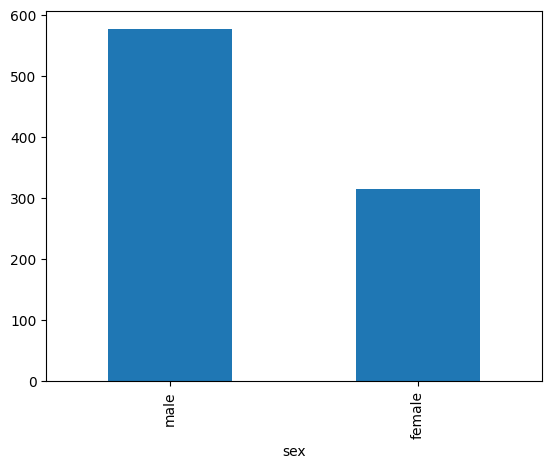

In [180]:
df['sex'].value_counts().plot(kind='bar')

원하는 열을 선택한 후 `value_counts()` 메서드를 적용한다. 고유값에는 male과 female이 있으며 male 데이터는 577개, female 데이터는 314개가 있다. 하나가 아닌 다중 열을 기준으로도 해당 메서드를 적용할 수 있다.

In [181]:
df[['sex', 'survived']].value_counts()

sex     survived
male    0           468
female  1           233
male    1           109
female  0            81
Name: count, dtype: int64

sex와 survived 열을 기준으로 고유값 별 갯수가 계산되었다. male/0(남성/사망)은 468개, female/1(여성/생존)은 233개, male/1(남성/생존)은 109개, female/0(여성/사망)은 81개 데이터가 있다. 그러나 정렬이 보기 불편한 형태이며, 개수가 아닌 비중으로 보는게 편할 수도 있다. 이번에는 이를 반영해보도록 하자.

<Axes: xlabel='sex,survived'>

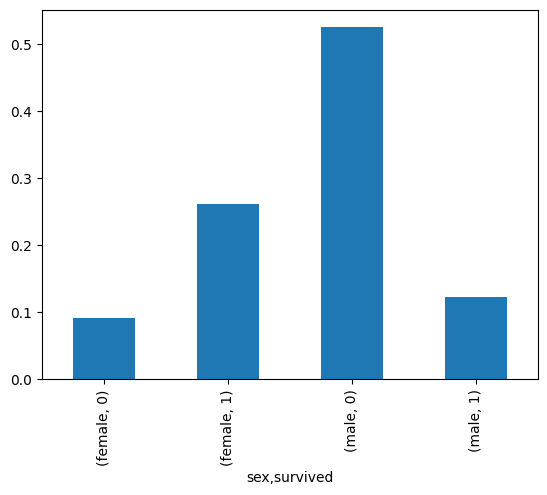

In [183]:
df[['sex', 'survived']].value_counts(normalize=True).sort_index().plot(kind='bar')

`value_counts()` 내에 `normalize=True`를 입력하면 비중으로 계산된다. 즉 female/0은 전체 891개 데이터 중 81개 이므로 81/891 = 0.090909가 계산된다. 또한 `sort_index()` 메서드는 인덱스를 정렬해준다.

pandas의 메서드를 이용하면 각종 통계값도 쉽게 구할 수 있다. 가장 많이 사용되는 통계값인 산술평균은 `mean()` 메서드를 통해 구할 수 있다.

In [186]:
df['survived'].mean()

0.3838383838383838

원하는 열을 선택한 후, `mean()`을 입력하면 평균이 계산된다. survived에서 0은 사망, 1은 생존을 의미하므로 평균인 0.38은 전체 사람 중 38%의 사람이 생존했다는 의미와 같다.

In [187]:
df[['survived', 'age']].mean()

survived     0.383838
age         29.699118
dtype: float64

여러개의 열을 리스트 형태로 입력하여 동시에 평균을 구할 수도 있다. 타이타닉호 탑승자의 평균연령은 약 30세 였다. 

그러나 극단적인 값이 존재할 경우 산술평균은 왜곡될 수 있다. fare(요금) 열의 특성을 살펴보자.

In [188]:
df['fare'].min()

0.0

In [189]:
df['fare'].max()

512.3292

In [190]:
df['fare'].mean()

32.204207968574636

`min()`과 `max()` 메서드는 각각 최소값과 최대값을 계산한다. 요금의 최저는 0원도 있는 반면, 최대는 512나 된다. 따라서 평균인 32는 극단치에 해당하는 비싼 요금들의 영향을 받았을 가능성이 높다. 이러한 경우 중위수를 의미하는 median이 더욱 평균을 잘 설명해준다고 볼 수 있으며, 이는 `median()` 메서드를 통해 계산이 가능하다.

In [191]:
df['fare'].median()

14.4542

fare 열의 중위수는 14로써 산술평균인 32보다 훨씬 낮다. 이처럼 데이터가 극단치가 있는 경우 산술평균과 함께 중위수를 확인할 필요가 있다.

pandas 패키지에는 이 외에도 통계값을 계산할 수 있는 다양한 메서드가 존재한다.

## 결측치 처리하기

타이타닉 데이터셋을 살펴보면 NaN이라는 데이터가 있다.

In [192]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


NaN은 'Not a Number'의 약자로써 결측치 혹은 누락값이라고 하며, 데이터를 입력할 때 빠지거나 소실된 값이다. 결측치가 많아지면 데이터의 품질이 떨어지고 제대로된 분석을 할 수 없기 때문에 적절하게 처리하는 과정이 필요하다. 먼저 결측치의 독특한 특성에 대해 살펴보자. 앞선 예제에서 `info()` 메서드를 통해 non-null인 데이터의 갯수, 즉 결측치가 아닌 데이터의 갯수를 확인할 수 있었다.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


deck 열에는 값이 203개 밖에 없으며, 891-203 = 688개 만큼의 결측치가 있음을 확인할 수 있다. 결측치를 찾는 방법으로는 `isnull()`과 `notnull()` 메서드가 있다.

- `isnull()`: 결측치면 True, 유효한 데이터면 False를 반환한다.
- `notnull()`: 유효한 데이터면 True, 결측치면 False를 반환한다.

타이타닉 데이터셋의 맨 위 데이터에 해당 메서드를 적용해보자.

In [196]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

앞서 1, 3, 5행의 deck 열은 결측치였으며, `isnull()` 메서드를 적용하면 해당 부분이 True로 나타난다.

### 결측치 삭제하기

결측치를 다루는 가장 간단한 방법은 결측치가 있는 행 또는 열을 삭제하는 것이며, `dropna()` 메서드를 사용한다.

In [197]:
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


`dropna()` 메서드는 데이터가 결측치가 있을 경우 해당 행을 모두 삭제한다. 891개 행이던 데이터가 182개로 줄어든 것이 확인된다. 

In [198]:
df.dropna(subset = ['age'], axis = 0)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


`dropna()` 메서드 내에 `subset`을 입력하면 해당 열 중에서 결측치가 있는 경우 행을 삭제한다. 참고로 `axis = 0`은 행 방향으로 동작하는 것을 의미한다..

이번에는 결측치가 있는 열을 삭제해보도록 하겠다.

In [29]:
df.dropna(axis = 1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


`axis = 1`을 입력하면 열 방향을 동작하여 결측치가 있는 열을 삭제한다. 즉 15개의 열 중 결측치가 존재하는 age, embarked, deck, embark_town 4개 열이 삭제되어 11개 열만 남게된다. 그러나 deck 열을 제외한 나머지 3개 열은 결측치가 얼마 없음에도 불구하고 일괄적으로 삭제되었다. 이러한 경우 기준치를 추가할 수 있다.

In [30]:
df.dropna(axis=1, thresh=300)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


`thresh = 300`는 결측치가 300개 이상 갖는 열을 삭제한다는 의미며, deck 열만 이 조건에 부합하여 삭제되었다.

### 결측치 대체하기

결측치가 있는 경우 데이터를 삭제해버리면 데이터의 양이 줄어들거나 편향되어 제대로 된 분석을 할 수 없을수도 있다. 따라서 데이터에 결측이 있을 경우 다른 값으로 대체하는 방법을 쓰기도 한다. 먼저 가장 간단한 방법은 특정 값으로 변경하는 것이며, 대표적으로 결측치를 평균으로 변경한다. 예를 들어 'age' 열의 결측치는 나머지 승객의 평균나이로 대체해보도록 하자.

In [31]:
df_2 = df.copy()

df_2.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


먼저 데이터프레임을 복사한 후 데이터를 살펴보면, 6번째 행의 age가 NaN으로 나타난다.

In [32]:
mean_age = df_2['age'].mean()
print(mean_age)

29.69911764705882


'age' 열의 평균을 구하면 대략 30세가 나온다. 이제 결측치를 해당 값으로 변경하며, 결측치를 특정 값으로 대체할 때는 `fillna()` 메서드를 사용하면 된다.

In [33]:
df_2['age'].fillna(mean_age, inplace=True)

C:\Users\masta\AppData\Local\Temp\ipykernel_21300\3137900447.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['age'].fillna(mean_age, inplace=True)


`fillna()` 내에 인자를 입력하면 결측치를 해당 값으로 대체한다. 또한 `inplace = True`를 입력하면 원본 객체를 변경한다.

In [34]:
df_2['age'].head(6)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
Name: age, dtype: float64

다시 데이터를 확인해보면 NaN 였던 6번째 행이 평균값인 29.699로 바뀌었다. 

`fillna()`를 통해 숫자가 아닌 문자로 변경할 수도 있다. embark_town의 결측치는 가장 데이터가 많은 'Southampton'으로 바꾸도록 하자.

In [35]:
df_2['embark_town'].fillna('Southampton', inplace=True)

C:\Users\masta\AppData\Local\Temp\ipykernel_21300\1603389194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['embark_town'].fillna('Southampton', inplace=True)


또한 서로 이웃하고 있는 데이터끼리는 유사성을 가질 가능성이 높으며, 특히 시계열 데이터는 더욱 그러하다. 이 경우 결측치를 바로 앞이나 뒤의 값으로 변경하는 것이 좋다. 먼저 결측치를 직전 행의 값으로 바꿔주는 예를 살펴보자.

In [36]:
df_2['deck_ffill'] = df_2['deck'].fillna(method='ffill')
df_2['deck_bfill'] = df_2['deck'].fillna(method='bfill')

df_2[['deck', 'deck_ffill', 'deck_bfill']].head(12)

C:\Users\masta\AppData\Local\Temp\ipykernel_21300\3502503026.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_2['deck_ffill'] = df_2['deck'].fillna(method='ffill')
C:\Users\masta\AppData\Local\Temp\ipykernel_21300\3502503026.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_2['deck_bfill'] = df_2['deck'].fillna(method='bfill')


,deck,deck_ffill,deck_bfill
0,NaN,NaN,C
1,C,C,C
2,NaN,C,C
3,C,C,C
4,NaN,C,E
5,NaN,C,E
6,E,E,E
7,NaN,E,G
8,NaN,E,G
9,NaN,E,G


`fillna()` 메서드에 `method = 'ffill'`을 입력하면 결측치가 있는 경우 위의 행 중 결측치가 나타나기 전의 값으로 바꿔주며 'deck_ffill' 열을 통해 이를 확인할 수 있다. 1행의 경우 처음부터 결측치이므로 참조할 값이 없어 그대로 결측치로 남아있다.

반면 `method = 'bfill'`을 입력하면 결측치가 있는 아래의 행 중 결측치가 아닌 첫 번째 값으로 바꿔주며, 'deck_bfill' 열을 통해 이를 확인할 수 있다.

## 인덱스 다루기

데이터프레임의 인덱스를 변경하거나 정렬하고, 재설정하는 법에 대해 살펴보도록 하자. 예제로써 seaborn 패키지의 mpg 데이터셋을 사용한다.

In [199]:
import seaborn as sns

df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


인덱스를 확인해보면 [0, 1, 2, .. ]로 위치 인덱스의 형태로 입력되어 있다. 이처럼 데이터를 불러오면 일반적으로 위치 인덱스가 입력된다. 먼저 인덱스를 자동차 이름인 'name' 열을 인덱스로 설정하도록 하자. 인덱스 설정에는 `set_index()` 메서드가 사용된다.

In [38]:
df.set_index('name', inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


`set_index()` 내에 인덱스로 설정하고자 하는 열을 입력하면 해당 열이 인덱스로 변경되며, `inplace = True`를 입력하면 원본 객체를 변경한다. 결과를 살펴보면 기존 'name' 열의 데이터가 인덱스로 변경되어 행 인덱스 형태가 되었다.

이번에는 인덱스를 순서대로 정렬해보도록 하겠다. 인덱스 정렬에는 `sort_index()` 메서드가 사용된다.

In [39]:
df.sort_index(inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
amc ambassador brougham,13.0,8,360.0,175.0,3821,11.0,73,usa
amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,usa
amc ambassador sst,17.0,8,304.0,150.0,3672,11.5,72,usa
amc concord,24.3,4,151.0,90.0,3003,20.1,80,usa
amc concord,19.4,6,232.0,90.0,3210,17.2,78,usa


`sort_index()` 메서드를 통해 인덱스가 알파벳 순서대로 정렬되며, 기본값인 오름차순(A→Z)으로 정렬된다.

In [40]:
df.sort_index(inplace=True, ascending=False)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
vw rabbit custom,31.9,4,89.0,71.0,1925,14.0,79,europe
vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,80,europe
vw rabbit,29.0,4,90.0,70.0,1937,14.2,76,europe
vw rabbit,41.5,4,98.0,76.0,2144,14.7,80,europe
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe


내림차순(Z→A) 순서로 정렬하고 싶을 경우 `ascending = False`를 입력해준다.

마지막으로 인덱스 재설정에는 `reset_index()` 메서드를 사용한다.

In [41]:
df.reset_index(inplace=True)
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,vw rabbit custom,31.9,4,89.0,71.0,1925,14.0,79,europe
1,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,80,europe
2,vw rabbit,29.0,4,90.0,70.0,1937,14.2,76,europe
3,vw rabbit,41.5,4,98.0,76.0,2144,14.7,80,europe
4,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe


`reset_index()` 메서드를 사용하면 인덱스가 다시 [0, 1, 2..]의 위치 인덱스로 변경되며, 기존에 존재하던 인덱스는 'name' 열로 옮겨진다.

## 필터링

필터링이란 시리즈 혹은 데이터프레임의 데이터에서 조건을 만족하는 원소만 추출하는 것으로써, 엑셀의 필터와 비슷한 개념이다. 필터링에는 크게 불리언 인덱싱(boolean indexing)과 `isin()` 메서드가 사용된다. 

### 불리언 인덱싱

먼저 불리언 인덱싱에 대해 알아보자. 시리즈 객체에 조건을 입력하면 각 원소에 대해 참 혹은 거짓을 판별하여 True/False로 이루어진 시리즈가 반환된다. 그 후 참에 해당하는 데이터만 선택하면 결과적으로 조건을 만족하는 데이터만 추출할 수 있다. mpg 데이터셋을 다시 불러오도록 하자.

In [42]:
df = sns.load_dataset('mpg')
df.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
388,26.0,4,156.0,92.0,2585,14.5,82,usa,chrysler lebaron medallion
389,22.0,6,232.0,112.0,2835,14.7,82,usa,ford granada l
390,32.0,4,144.0,96.0,2665,13.9,82,japan,toyota celica gt
391,36.0,4,135.0,84.0,2370,13.0,82,usa,dodge charger 2.2
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


'cylinders' 열은 자동차의 실린더 개수를 의미하며, 어떠한 값이 있는지 확인해보자.

In [202]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

`unique()` 메서드는 고유한 값을 반환하며, [3, 4, 5, 6, 8]이 있다. 이 중 실린더가 4인 조건을 입력한다.

In [44]:
filter_bool = (df['cylinders'] == 4)
filter_bool.tail(10)

0      False
1      False
2      False
3      False
4      False
       ...  
393     True
394     True
395     True
396     True
397     True
Name: cylinders, Length: 398, dtype: bool

`df['cylinders'] == 4`는 실린더 열이 4인 조건을 의미한다. 원래의 데이터와 비교해보면 실린더가 4인 원소는 True가, 그렇지 않으면 False가 반환되었다. 이제 해당 불리언 시리즈를 데이터프레임에 대입해보도록 한다.

In [206]:
df.loc[(df['cylinders'] == 4),:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
14,24.0,4,113.0,95.0,2372,15.0,70,japan,toyota corona mark ii
18,27.0,4,97.0,88.0,2130,14.5,70,japan,datsun pl510
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan
20,25.0,4,110.0,87.0,2672,17.5,70,europe,peugeot 504
21,24.0,4,107.0,90.0,2430,14.5,70,europe,audi 100 ls
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


행 인덱스에 불리언 시리즈를 입력하면 해당 조건을 만족하는 행만 선택되며, 총 398개 행 중 204개만 남게 되었다.

조건을 하나가 아닌 여러개를 입력할 수도 있다. 이번에는 실린더 개수가 4개이고, 마력이 100 인상인 데이터를 선택해보도록 한다.

In [46]:
filter_bool_2 = (df['cylinders'] == 4) & (df['horsepower'] >= 100)
df.loc[filter_bool_2, ['cylinders', 'horsepower', 'name']]

,cylinders,horsepower,name
23,4,113.0,bmw 2002
76,4,112.0,volvo 145e (sw)
120,4,112.0,volvo 144ea
122,4,110.0,saab 99le
180,4,115.0,saab 99le
207,4,102.0,volvo 245
242,4,110.0,bmw 320i
271,4,105.0,plymouth sapporo
276,4,115.0,saab 99gle
323,4,105.0,dodge colt


`&` 연산자를 통해 원하는 조건들을 결합하면 두개 조건을 동시에 만족하는 데이터가 선택되었다. 또한 열 이름을 리스트 형태로 입력하면 해당 열만 선택된다. 

### `isin()` 메서드

만일 name이 'ford maverick', 'ford mustang ii', 'chevrolet impala'인 데이터를 선택하려면 어떻게 해야할까? 불리언 인덱싱을 사용하면 다음과 같이 입력해야 한다.

In [47]:
filter_bool_3 = (df['name'] == 'ford maverick') | (
    df['name'] == 'fford mustang ii') | (df['name'] == 'chevrolet impala')
df.loc[filter_bool_3, ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick
38,14.0,8,350.0,165.0,4209,12.0,71,usa,chevrolet impala
62,13.0,8,350.0,165.0,4274,12.0,72,usa,chevrolet impala
100,18.0,6,250.0,88.0,3021,16.5,73,usa,ford maverick
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
155,15.0,6,250.0,72.0,3158,19.5,75,usa,ford maverick
193,24.0,6,200.0,81.0,3012,17.6,76,usa,ford maverick


각각의 조건을 or 조건에 해당하는 `|` 연산자를 통해 결합하면 세 개 조건 중 하나를 만족하는 데이터가 선택된다. 그러나 이러한 방법은 코드가 너무 길어지며, `df['name']`가 계속해서 반복된다. `isin()` 메서드를 이용하면 특정 값을 가진 행을 추출할 수 있으며, 동일한 결과를 훨씬 간단하게 나타낼 수 있다.

In [48]:
filter_isin = df['name'].isin(
    ['ford maverick', 'ford mustang ii', 'chevrolet impala'])
df.loc[filter_isin, ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick
38,14.0,8,350.0,165.0,4209,12.0,71,usa,chevrolet impala
62,13.0,8,350.0,165.0,4274,12.0,72,usa,chevrolet impala
100,18.0,6,250.0,88.0,3021,16.5,73,usa,ford maverick
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
155,15.0,6,250.0,72.0,3158,19.5,75,usa,ford maverick
166,13.0,8,302.0,129.0,3169,12.0,75,usa,ford mustang ii
193,24.0,6,200.0,81.0,3012,17.6,76,usa,ford maverick


`isin()` 메서드 내에 조건들을 리스트 형태로 입력하면, 해당 값이 존재하는 행은 True를, 값이 없으면 False를 반환한다. 결과를 확인해보면 위의 불리언 인덱싱을 사용한 방법과 값이 동일하다.

마지막으로 선택된 조건을 horsepower 순으로 정렬해보도록 하자.

In [49]:
df.loc[filter_isin, ].sort_values('horsepower')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
155,15.0,6,250.0,72.0,3158,19.5,75,usa,ford maverick
193,24.0,6,200.0,81.0,3012,17.6,76,usa,ford maverick
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick
100,18.0,6,250.0,88.0,3021,16.5,73,usa,ford maverick
166,13.0,8,302.0,129.0,3169,12.0,75,usa,ford mustang ii
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
38,14.0,8,350.0,165.0,4209,12.0,71,usa,chevrolet impala
62,13.0,8,350.0,165.0,4274,12.0,72,usa,chevrolet impala
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick


`sort_values()` 메서드는 입력한 열의 값 기준으로 정렬을 해준다. horsepower가 낮은 것부터 오름차순으로 정렬이 되며, 내림차순으로 정렬하고자 하면 `ascending=False`을 입력하면 된다.

## 새로운 열 만들기

기존에 존재하는 데이터를 바탕으로 새로운 열을 만드는 법에 대해 알아보겠다. mpg 데이터셋에서 mpg 열은 연비, wt 열은 무게를 나타내며, 무게 대비 연비(mpg/wt)를 나타내는 'ratio' 열을 만들어보도록 하자.

In [50]:
df['ratio'] = (df['mpg'] / df['weight']) * 100
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,ratio
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.513699
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.406174
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.523865
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.466065
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.492896


시리즈끼리는 서로 연산이 가능하므로, mpg 열을 weight 열로 나눈 후 100을 곱한다. 그 후 데이터프레임에 `[ ]`를 붙여 새롭게 만들 열 이름을 입력하고 계산한 결과를 입력한다. 결과를 확인해보면 가장 오른쪽에 'ratio' 열이 새롭게 만들어진다.

특정 열의 조건을 기반으로 새로운 열을 만들 수 있으며, 이 경우 조건문 함수가 사용된다. 조건문 함수는 특정 조건을 만족했는지 여부에 따라 서로 다른 값을 부여하며, 대표적으로 NumPy 패키지의 `where()` 함수가 사용된다. 아래의 예를 살펴보자.

In [51]:
import numpy as np

num = pd.Series([-2, -1, 1, 2])
np.where(num >= 0)

(array([2, 3], dtype=int64),)

먼저 -2부터 2까지 숫자로 이루어진 시리즈(num)를 만들었다, 그 후 `where()` 함수 내에 조건을 입력하면 조건이 True인 지점의 인덱스를 반환한다.

In [52]:
np.where(num >= 0, '양수', '음수')

array(['음수', '음수', '양수', '양수'], dtype='<U2')

조건 뒤의 두 번째와 세 번째 인자에 값을 추가하면 조건을 만족하는 부분은 두 번째 인자(양수)를, 그렇지 않은 부분은 세 번째 인자(음수)를 부여한다. 이는 엑셀에서의 `if` 함수와 같다. 이를 응용하여 horsepower가 100 미만, 100 이상, 200 이상인지를 구분하는 열을 만들어보도록 하자.

In [53]:
import numpy as np

df['horse_power_div'] = np.where(
    df['horsepower'] < 100, '100 미만',
    np.where((df['horsepower'] >= 100) & (df['horsepower'] < 200), '100 이상',
             np.where(df['horsepower'] >= 200, '200 이상', '기타')))

df.head(8)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,ratio,horse_power_div
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.513699,100 이상
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.406174,100 이상
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.523865,100 이상
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.466065,100 이상
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.492896,100 이상
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,0.345543,100 이상
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,0.321543,200 이상
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,0.324675,200 이상


먼저 `where()` 함수 내에 horsepower가 100 보다 작을 경우 '100 미만'이라고 입력한다. 그렇지 않을 경우에는 다시 `where()` 함수를 사용하여 horsepower가 100 이상이고 200 미만일 경우에는 '100 이상', horsepower가 200 보다 클 경우에는 '200 이상', 마지막으로 모든 조건을 만족하지 않으면 '기타'를 부여한다. 그 후 해당 결과를 'horse_power_div' 열에 추가하면 'horsepower'열을 조건으로 하는 새로운 열이 만들어진다.

## 데이터프레임 합치기

필요한 데이터가 하나의 데이터프레임에 모두 있는 경우는 드물다. 따라서 여러 데이터프레임을 하나로 합치거나 연결해야 할 경우가 많다. pandas에서 데이터프레임을 합치는 함수에는 `concat()`, `merge()`, `join()` 이 있다.

### `concat()` 함수

먼저 행 혹은 열 방향을 데이터프레임을 이어 붙이는 개념인 `concat()` 함수에 대해 살펴보도록 하자.


In [54]:
import pandas as pd

df1 = pd.DataFrame({
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"]
},
    index=[0, 1, 2, 3],
)

df2 = pd.DataFrame({
    "A": ["A4", "A5", "A6", "A7"],
    "B": ["B4", "B5", "B6", "B7"],
    "C": ["C4", "C5", "C6", "C7"],
    "D": ["D4", "D5", "D6", "D7"]
},
    index=[4, 5, 6, 7],
)

df3 = pd.DataFrame({
    "A": ["A8", "A9", "A10", "A11"],
    "B": ["B8", "B9", "B10", "B11"],
    "C": ["C8", "C9", "C10", "C11"],
    "D": ["D8", "D9", "D10", "D11"]
},
    index=[8, 9, 10, 11],
)

result = pd.concat([df1, df2, df3])

result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


```{figure} image/eda/merging_concat_basic.png
---
name: merging_concat_basic
---
concat - 기본
```

데이터프레임 df1, df2, df3는 열 인덱스가 A, B, C, D로 이루어져 있다. 이들을 `concat()` 함수 내에 리스트 형태로 입력하면 행 방향으로 데이터프레임이 합쳐진다. 이번에는 열 이름이 서로 다른 경우를 살펴보자. 

In [55]:
df4 = pd.DataFrame({
    "B": ["B2", "B3", "B6", "B7"],
    "D": ["D2", "D3", "D6", "D7"],
    "F": ["F2", "F3", "F6", "F7"]
},
    index=[2, 3, 6, 7]
)

result = pd.concat([df1, df4])

result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


```{figure} image/eda/merging_concat_ignore_index.png
---
name: merging_concat_ignore_index
---
concat - 열 이름이 다른 경우
```

df1은 열 이름이 A, B, C, D 이지만 df4는 열 이름이 B, D, F로 구성되어 있다. 이 두개의 데이터프레임을 `concat()` 함수로 합치면 열 이름이 합집합을 기준으로 생성되며, 해당하는 열에 데이터가 없는 경우 `NaN`으로 입력된다. df1의 경우 F열이 없으므로 NaN이, df4의 경우 A, C열이 없으므로 NaN으로 채워진다.

행 인덱스를 초기화 하고 싶을 경우 `ignore_index=True`를 입력한다.

In [56]:
result = pd.concat([df1, df4], ignore_index=True)

result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


```{figure} image/eda/merging_concat_ignore_index_row.png
---
name: merging_concat_ignore_index_row
---
concat - 행 인덱스 초기화
```

기존에는 원래 데이터프레임의 행 인덱스가 그대로 유지되었으나, `ignore_index=True`를 입력하면 행 인덱스가 초기화 되어 0에서부터 7까지의 값을 가진다.

이번에는 행이 아닌 열 기준으로 데이터를 합쳐보도록 하자.

In [57]:
result = pd.concat([df1, df4], axis=1)

result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


```{figure} image/eda/merging_concat_axis1.png
---
name: merging_concat_axis1
---
concat - 열 방향으로 합치기
```

`axis=1` 인자를 입력하면 열 방향으로 데이터가 합쳐지며, 행 인덱스를 기준으로 연결된다. df1은 행 인덱스가 0, 1, 2, 3이며 df4는 행 인덱스가 2, 3, 6, 7이다. 따라서 `concat()` 함수의 결과 행 인덱스는 합집합인 0, 1, 2, 3, 6, 7이 생성되며 해당하는 행에 데이터가 없을 경우 `NaN`으로 입력된다. 만일 합집합이 아닌 교집합을 기준으로 사용하고 싶을 경우 `join = inner` 인자를 추가로 입력한다.

In [58]:
result = pd.concat([df1, df4], axis=1, join="inner")

result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


```{figure} image/eda/merging_concat_axis1_inner.png
---
name: merging_concat_axis1_inner
---
concat - 열 방향으로 합치기 (교집합)
```

두 데이터프레임이 공통으로 존재하는 행 인덱스인 2, 3을 기준으로만 데이터가 합쳐졌다. 

데이터프레임에 시리즈를 합칠수도 있다.

In [59]:
s1 = pd.Series(["X0", "X1", "X2", "X3"], name="X")
result = pd.concat([df1, s1], axis=1)

result

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


```{figure} image/eda/merging_concat_mixed_ndim.png
---
name: merging_concat_mixed_ndim
---
concat - 시리즈 합치기
```

원래 데이터프레임의 각 열은 시리즈로 구성되어 있으므로, 기존의 데이터프레임에 시리즈를 합칠수 있다.

### `merge()` 함수

`merge()` 함수는 기준이 되는 열이나 인덱스, 즉 키(key)를 기준으로 두 데이터프레임을 합친다. 데이터프레임을 병합하는 방법은 크게 inner join, left join, right join, outer join으로 구분된다.

- inner join: `pd.merge(left, right, on = ‘key’, how = 'inner')` (`how = 'inner'`는 생략 가능)
- left join: `pd.merge(left, right, on = ‘key’, how = 'left')`
- right join: `pd.merge(left, right, on = ‘key’, how = 'right')`
- outer join: `pd.merge(left, right, on = ‘key’, how = 'outer')`


```{figure} image/eda/inner_join.png
---
scale: 50%
name: inner_join
---
inner join
```

inner join은 양쪽 데이터프레임에서 기준이 되는 열의 데이터가 모두 있는 교집합 부분만 반환한다. 예를 살펴보자.

In [60]:
left = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"]
})


right = pd.DataFrame({
    "key": ["K0", "K1", "K3", "K4"],
    "C": ["C0", "C1", "C3", "C4"],
    "D": ["D0", "D1", "D3", "D4"],
})

result = pd.merge(left, right, on="key")

result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K3,A3,B3,C3,D3


```{figure} image/eda/inner_join_result.png
---
name: inner_join_result
---
inner join 결과
```

합치려는 두 데이터프레임을 `merge()` 함수에 입력하며, 기준이 되는 열을 `on` 뒤에 입력한다. `merge()` 함수는 기본적으로 inner join으로 데이터를 합친다. left 데이터프레임에서 key 열의 값은 K0, K1, K2, K3이며, right 데이터프레임에서 key 열의 값은 K0, K1, K3, K4다. 따라서 key 열의 데이터가 둘의 교집합에 해당하는 K0, K1, K3인 행만 선택되어 열 방향으로 합쳐졌다.

```{figure} image/eda/left_join.png
---
scale: 50%
name: left_join
---
left join
```

left join은 왼쪽 데이터프레임은 유지가 되며, 오른쪽 데이터프레임이 키를 기준으로 합쳐진다.

In [61]:
result = pd.merge(left, right, on="key", how='left')

result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,C3,D3


```{figure} image/eda/left_join_result.png
---
name: left_join_result
---
left join 결과
```

먼저 left 데이터프레임은 형태를 유지하며, right 데이터프레임은 키 값을 기준으로 열 방향으로 합쳐진다. right 데이터프레임의 key 열에는 K2 값이 없으므로 해당 부분은 NaN으로 채워지며, right 데이터프레임에만 존재하는 K4 값에 해당하는 부분은 삭제된다.

```{figure} image/eda/right_join.png
---
scale: 50%
name: right_join
---
right join
```

right join은 left join과 반대로 오른쪽 데이터프레임이 유지가 되며, 왼쪽 데이터프레임이 키를 기준으로 합쳐진다.

In [62]:
result = pd.merge(left, right, on="key", how='right')

result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K3,A3,B3,C3,D3
3,K4,NaN,NaN,C4,D4


```{figure} image/eda/right_join_result.png
---
name: right_join_result
---
right join 결과
```

이번에는 right 데이터프레임에 있는 key 값인 K0, K1, K3, K4을 기준으로 left 데이터프레임이 합쳐졌다.

```{figure} image/eda/outer_join.png
---
scale: 50%
name: outer_join
---
outer join
```

outer join은 데이터프레임 중 어느 한쪽에만 속하더라도 상관없이 합집합 부분을 반환한다.

In [63]:
result = pd.merge(left, right, on="key", how='outer')

result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,C3,D3
4,K4,NaN,NaN,C4,D4


```{figure} image/eda/outer_join_result.png
---
name: outer_join_result
---
outer join 결과
```

두 데이터프레임의 key 열에 존재하는 모든 데이터 K0, K1, K2, K3, K4를 기준으로 데이터들이 합쳐진다.

기준이 되는 열의 이름이 서로 다른 경우는 `left_on`과 `right_on`을 통해 키를 직접 선언한다.

In [64]:
left = pd.DataFrame({
    "key_left": ["K0", "K1", "K2", "K3"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"]
})


right = pd.DataFrame({
    "key_right": ["K0", "K1", "K3", "K4"],
    "C": ["C0", "C1", "C3", "C4"],
    "D": ["D0", "D1", "D3", "D4"],
})

result = pd.merge(left, right, left_on='key_left',
                  right_on='key_right', how='inner')

result

,key_left,A,B,key_right,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K3,A3,B3,K3,C3,D3


```{figure} image/eda/left_join_result_diff.png
---
name: left_join_result_diff
---
left join (키가 다른 경우)
```

`merge(left, right)`가 아닌 `left.merge(right)` 형태로 함수를 작성할 수도 있다.

In [65]:
result = left.merge(right, left_on='key_left',
                    right_on='key_right', how='inner')

result

,key_left,A,B,key_right,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K3,A3,B3,K3,C3,D3


```{figure} image/eda/left_join_result_diff.png
---
name: left_join_result_diff
---
left.merge(right) 형태
```

해당 방법으로 코드를 작성할 경우 왼쪽 데이터프레임에 오른쪽 데이터프레임을 붙인다는 점이 더욱 직관적으로 표현된다.

### `join()` 메서드

`join()` 메서드는 `merge()` 함수를 기반으로 만들어져 사용방법이 거의 비슷하다. 다만, `join()` 메서드는 두 데이터프레임의 행 인덱스를 기준으로 데이터를 결합한다.

In [66]:
left = pd.DataFrame({
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"]},
    index=["K0", "K1", "K2", "K3"]
)


right = pd.DataFrame({
    "C": ["C0", "C1", "C3", "C4"],
    "D": ["D0", "D1", "D3", "D4"]},
    index=["K0", "K1", "K3", "K4"])

result = left.join(right)

result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1
K2,A2,B2,NaN,NaN
K3,A3,B3,C3,D3


```{figure} image/eda/join.png
---
name: join
---
join 함수
```

`join()` 메서드는 디폴트로 left join 방법을 사용한다. `merge()` 함수는 키를 기준으로 결합을, `join()` 메서드는 행 인덱스를 기준으로 결합을 한다는 점을 제외하고 나머지 사용법은 거의 비슷하다.

## 데이터 재구조화

데이터프레임의 행과 열 구조를 변형하거나, 특정 요인에 따라 집계를 하는 방법에 대해 알아보겠다. pandas에서 데이터 재구조화에 사용되는 함수는 `melt()`, `pivot_table()`, `stack()`, `unstack()` 등이 있다. 예제로써 seaborn 패키지의 팽귄 데이터를 사용한다.

In [67]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


해당 데이터는 팔머(Palmer) 펭귄의 세가지 종에 대한 데이터이며, 각 열의 내용은 다음과 같다.

- species: 펭귄 종으로써 아델리(Adelie), 젠투(Gentoo), 턱끈(Chinstrap) 펭귄 세가지 종이 있다.
- island: 남극의 펭귄 서식지로써 Torgersen, Biscoe, Dream가 있다.
- bill_length_mm: 부리의 길이에 해당한다.
- bill_depth_mm: 부리의 위아래 두께에 해당한다.
- flipper_length_mm: 펭귄의 날개에 해당한다.
- body_mass_g: 몸무게에 해당한다.
- sex: 성별에 해당한다.

#### `melt()`

`melt()` 함수는 ID 변수를 기준으로 원본 데이터프레임의 열 이름들을 variable 열에, 각 열에 있던 데이터는 value 열에 넣어 아래로 긴 형태로 만들어준다.

In [68]:
df.melt(id_vars=['species', 'island']).head(10)

,species,island,variable,value
0,Adelie,Torgersen,bill_length_mm,39.1
1,Adelie,Torgersen,bill_length_mm,39.5
2,Adelie,Torgersen,bill_length_mm,40.3
3,Adelie,Torgersen,bill_length_mm,NaN
4,Adelie,Torgersen,bill_length_mm,36.7
5,Adelie,Torgersen,bill_length_mm,39.3
6,Adelie,Torgersen,bill_length_mm,38.9
7,Adelie,Torgersen,bill_length_mm,39.2
8,Adelie,Torgersen,bill_length_mm,34.1
9,Adelie,Torgersen,bill_length_mm,42.0


`id_vars`에 입력한 열은 식별자 변수에 해당하므로 원래의 열이 그대로 유지된다. 반면 그 외의 열 이름인 bill_length_mm,	bill_depth_mm, flipper_length_mm, body_mass_g, sex가 variable 열에 입력되며, 각 열의 데이터가 value 열에 매칭된다.

### `pivot_table()`

`pivot_table()` 함수는 엑셀의 피벗 테이블과 비슷하며 총 4개 입력값이 필요하다.

- index: 행 인덱스
- columns: 열 인덱스
- values: 데이터 값
- aggfunc: 데이터 집계 함수

펭귄 데이터의 species와 island 별로 bill_length_mm의 평균을 구해보자.

In [69]:
df_pivot_1 = df.pivot_table(index='species',
                            columns='island',
                            values='bill_length_mm',
                            aggfunc='mean')

df_pivot_1

island,Biscoe,Dream,Torgersen
species,,,
Adelie,38.975000,38.501786,38.95098
Chinstrap,NaN,48.833824,NaN
Gentoo,47.504878,NaN,NaN


행 인덱스에는 species, 열 인덱스에는 island, 데이터 값에는 bill_length_mm, 집계 함수는 mean을 입력하면 테이블 형태의 결과를 반환한다. Chinstrap-Biscoe, Chinstrap-Torgersen, Gentoo-Dream, Gentoo-Torgersen 처럼 데이터가 없는 값은 NaN으로 채워진다.

각 인덱스를 하나가 아닌 여러개를 입력할 수 있으며, 데이터 값, 집계 함수 역시 여러개를 입력할 수 있다.

In [70]:
df_pivot_2 = df.pivot_table(index=['species', 'sex'],
                            columns='island',
                            values=['bill_length_mm', 'flipper_length_mm'],
                            aggfunc=['mean', 'count'])

df_pivot_2

mean                                          \
                 bill_length_mm                       flipper_length_mm   
island                   Biscoe      Dream  Torgersen            Biscoe   
species   sex                                                             
Adelie    Female      37.359091  36.911111  37.554167        187.181818   
          Male        40.590909  40.071429  40.586957        190.409091   
Chinstrap Female            NaN  46.573529        NaN               NaN   
          Male              NaN  51.094118        NaN               NaN   
Gentoo    Female      45.563793        NaN        NaN        212.706897   
          Male        49.473770        NaN        NaN        221.540984   

                                                  count                  \
                                         bill_length_mm                   
island                 Dream   Torgersen         Biscoe Dream Torgersen   
species   sex                                                             
Adelie    Female  187.851852  188.291667           22.0  27.0      24.0   
          Male    191.928571  194.913043           22.0  28.0      23.0   
Chinstrap Female  191.735294         NaN            NaN  34.0       NaN   
          Male    199.911765         NaN            NaN  34.0       NaN   
Gentoo    Female         NaN         NaN           58.0   NaN       NaN   
          Male           NaN         NaN           61.0   NaN       NaN   

                                                    
                 flipper_length_mm                  
island                      Biscoe Dream Torgersen  
species   sex                                       
Adelie    Female              22.0  27.0      24.0  
          Male                22.0  28.0      23.0  
Chinstrap Female               NaN  34.0       NaN  
          Male                 NaN  34.0       NaN  
Gentoo    Female              58.0   NaN       NaN  
          Male                61.0   NaN       NaN

행으로는 species와 sex, 열로는 island, 데이터 값에는 bill_length_mm와 flipper_length_mm을 입력했으며, 집계 함수로 입력한 평균 및 갯수가 계산되었다. 이처럼 복수의 조건을 입력하고 싶을 경우는 리스트 형태로 입력하면 된다.

### `stack()`과 `unstack()`

`stack()` 메서드와 `unstack()` 메서드는 열 인덱스를 행 인덱스로 바꾸거나 반대로 행 인덱스를 열 인덱스로 변경한다.

- `stack()`: 열 인덱스를 행 인덱스로 변환
- `unstack()`: 행 인덱스를 열 인덱스로 변환

먼저 `pivot_table()`을 통해 아래의 데이터프레임을 만들자.

In [71]:
df_pivot_4 = df.pivot_table(index=['species', 'sex'],
                            columns='island',
                            values='bill_length_mm',
                            aggfunc='mean')

df_pivot_4

island               Biscoe      Dream  Torgersen
species   sex                                    
Adelie    Female  37.359091  36.911111  37.554167
          Male    40.590909  40.071429  40.586957
Chinstrap Female        NaN  46.573529        NaN
          Male          NaN  51.094118        NaN
Gentoo    Female  45.563793        NaN        NaN
          Male    49.473770        NaN        NaN

위 데이터프레임에 `stack()` 메서드를 적용해보자.

In [92]:
df_pivot_4.stack()

species    sex     island   
Adelie     Female  Biscoe       37.359091
                   Dream        36.911111
                   Torgersen    37.554167
           Male    Biscoe       40.590909
                   Dream        40.071429
                   Torgersen    40.586957
Chinstrap  Female  Dream        46.573529
           Male    Dream        51.094118
Gentoo     Female  Biscoe       45.563793
           Male    Biscoe       49.473770
dtype: float64

열 인덱스인 Biscoe, Dream, Torgersen이 행 인덱스로 변경되었다. 해당 결과물은 시리즈 형태이며, 데이터프레임으로 변경하고 싶을 경우 `to_frame()` 메서드를 추가한다.

In [93]:
df_pivot_4.stack().to_frame()

0
species   sex    island              
Adelie    Female Biscoe     37.359091
                 Dream      36.911111
                 Torgersen  37.554167
          Male   Biscoe     40.590909
                 Dream      40.071429
                 Torgersen  40.586957
Chinstrap Female Dream      46.573529
          Male   Dream      51.094118
Gentoo    Female Biscoe     45.563793
          Male   Biscoe     49.473770

이번에는 `unstack()` 메서드를 적용해보도록 하자.

In [94]:
df_pivot_4.unstack()

island        Biscoe                 Dream             Torgersen           
sex           Female       Male     Female       Male     Female       Male
species                                                                    
Adelie     37.359091  40.590909  36.911111  40.071429  37.554167  40.586957
Chinstrap        NaN        NaN  46.573529  51.094118        NaN        NaN
Gentoo     45.563793  49.473770        NaN        NaN        NaN        NaN

행 인덱스인 Female, Male이 열 인덱스로 변경되었다.

## 데이터프레임에 함수 적용하기

`apply()` 메서드를 사용하면 시리즈나 데이터프레임의 개별 원소에 함수를 적용할 수 있다. 이는 사용자가 직접 만든 함수(lambda 함수 포함)를 적용할 수 있어 기본함수로 처리하기 어려운 복잡한 연산도 가능하며, for문을 사용해 각 데이터에 함수를 적용하는 것 보다 더 빠르게 연산이 가능하다.

### 시리즈에 함수 적용하기

시리즈 객체에 `apply()` 메서드를 적용하면 모든 원소를 함수에 적용하여 결과값을 반환한다.

- `series.apply(함수)`

먼저 펭귄 데이터에서 'bill_length_mm' 열만 선택해 샘플 시리즈 객체를 만들어 보자.

In [95]:
import seaborn as sns

df = sns.load_dataset('penguins')
bill_length_mm = df['bill_length_mm']

bill_length_mm.head()

0    39.1
1    39.5
2    40.3
3     NaN
4    36.7
Name: bill_length_mm, dtype: float64

해당 시리즈 원소들의 제곱근을 구해보도록 하겠다.

In [96]:
import numpy as np

result = bill_length_mm.apply(np.sqrt)
result.head()

0    6.252999
1    6.284903
2    6.348228
3         NaN
4    6.058052
Name: bill_length_mm, dtype: float64

`numpy` 패키지의 `sqrt()` 함수는 제곱근을 구해준다. 먼저 `apply()` 메서드 내부에 해당 함수를 입력하면, 'bill_length_mm' 시리즈의 모든 원소들에 함수가 적용되어 제곱근이 구해진다. 이번에는 함수를 새롭게 만든 후 시리즈에 적용해보도록 하자.

In [97]:
def mm_to_cm(num):
    return num / 10

result_2 = bill_length_mm.apply(mm_to_cm)
result_2.head()

0    3.91
1    3.95
2    4.03
3     NaN
4    3.67
Name: bill_length_mm, dtype: float64

`mm_to_cm()` 함수는 숫자를 입력하면 10으로 나눈 결과를 반환한다. 위와 동일하게 `apply()` 메서드 내부에 해당 함수를 입력하면 시리즈의 모든 원소가 10으로 나누어진다.

### 데이터프레임에 함수 적용하기

데이터프레임에 `apply()` 메서드를 적용하면 모든 열 혹은 행을 하나씩 분리하여 함수에 각 원소가 전달된 후 값이 반환된다. 각 열 혹은 행에 함수를 적용하는 법은 다음과 같다.

- 각 열에 적용: `DataFrame.apply(함수)` 혹은 `DataFrame.apply(함수, axis = 0)`
- 각 행에 적용: `DataFrame.apply(함수, axis = 1)`

먼저 펭귄 데이터셋에서 숫자로만 이루어진 열을 선택해보자.

In [98]:
df_num = df[['bill_length_mm', 'bill_depth_mm',
             'flipper_length_mm', 'body_mass_g']]
df_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


이제 위 데이터프레임에 `apply()` 메서드를 이용해 최대값을 구하는 `max()` 함수를 적용해본다. 먼저 각 열에 함수를 적용해보자.

In [99]:
df_num.apply(max)
# df_num.apply(max, axis=0)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

`apply(max)` 혹은 `apply(max, axis=0)`를 입력하면 각 열 별로 최대값을 구한다. 이번에는 각 행에 함수를 적용해보자.

In [100]:
df_num.apply(max, axis=1)

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Length: 344, dtype: float64

함수를 적용하는 방향을 의미하는 `axis`에 1을 입력하면 각 행에 함수를 적용한다. 즉 첫번째 행에서 최대값은 3750.0, 두 번째 행에서 최대값은 3800.0이 계산된다.

시리즈와 마찬가지로 함수를 직접 만든 후 이를 적용할 수도 있다. 각 열에서 결측치가 얼마나 있는지 확인해보자.

In [101]:
def num_null(data):
    null_vec = pd.isnull(data)
    null_count = np.sum(null_vec)

    return null_count

df_num.apply(num_null)

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

1. `isnull()` 함수는 결측치 여부를 판단하며, 결측치면 True, 아니면 False를 반환한다.
2. True는 1, False는 0과 매칭되므로, `sum()` 함수를 통해 위에서 계산된 값을 더하면 True에 해당하는 값이 더해져 결측치의 갯수를 의미한다.
3. `apply()` 메서드를 통해 각 열에 해당 함수를 적용한다.

모든 열에서 결측치가 2개씩 있는 것이 확인된다.

## 그룹 연산하기

데이터를 특정 기준에 따라 그룹으로 나눈 후 처리하는 작업을 그룹 연산이라고 한다. 그룹 연산은 일반적으로 3단계 과정으로 이루어진다.

- 분할(split): 데이터를 특정 기준에 따라 분할
- 적용(apply): 데이터를 집계, 변환, 필터링하는 메서드 적용
- 결합(combine): 적용의 결과를 하나로 결합

```{figure} image/eda/group.png
---
name: group
---
그룹 연산의 개념
```

{numref}`group`은 그룹 연산의 개념을 그림으로 나타낸 것이다. 먼저 데이터프레임에서 'Col 1'이 A, B, C인 데이터 별로 그룹을 나눈 후, 각 그룹에서 'Col 2'의 합을 구한다. 마지막으로 계산된 결과를 하나로 합친다. 펭귄 데이터셋을 통해 그룹 연산을 배워보도록 하자.

In [102]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 그룹 나누기

먼저 'species'에 따라 데이터의 그룹을 나눠주도록 하며, `groupby()` 메서드를 사용한다.

In [103]:
df_group = df.groupby(['species'])

df_group

In [104]:
df_group.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male


`groupby()` 메서드 내에 기준이 되는 열을 입력하면 그룹 객체가 만들어진다. 현재는 분할만 이루어진 상태이므로 데이터를 출력해도 기존의 데이터프레임과는 크게 차이가 나지 않는다.

In [105]:
for key, group in df_group:
    print(key)
    display(group.head(2))

('Adelie',)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


('Chinstrap',)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male


('Gentoo',)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male


그러나 for문을 이용해 그룹객체의 이름과 데이터를 확인해보면 species인 Adelie, Chinstrap, Gentoo에 따라 데이터가 분할되어 있다.

### 그룹 별 연산하기

원하는 조건에 따라 그룹을 나누었다면, 그룹 별 연산을 해보자. 먼저 그룹 별 평균을 구해보도록 한다.

In [106]:
df_group[[
    'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'
]].mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


그룹 객체에 `mean()` 메서드를 적용하면 각 그룹 별 평균이 계산된다. 이 외에도 `groupby()`와 함께 pandas에 내장되어 있는 다양한 집계 메서드를 사용할 수 있다.

- 판다스 내 집계 메서드
:name: method
| 메서드 | 기능 |
| --- | --- |
| `count` | 누락값을 제외한 데이터 수 |
| `size` | 누락값을 포함한 데이터 수 |
| `mean` | 평균 |
| `std` | 표준편차 | 
| `var` | 분산 |
| `min` | 최소값 |
| `max` | 최대값 | 
| `quantile(q=0.25)` | 백분위수 25% |
| `quantile(q=0.50)` | 백분위수 50% |
| `quantile(q=0.75)` | 백분위수 75% |
| `sum` | 전체 합 |
| `describe` | 데이터 수, 평균, 표준편차, 최소값, 백분위수(25, 50, 75%), 최대값 반환 |
| `first` | 첫번째 행 반환 |
| `last` | 마지막 행 반환 |
| `nth` | n번째 행 반환 |


그룹의 기준을 하나가 아닌 여러 열로 설정하는 것 역시 가능하다. 이번에는 'species'와 'sex'에 따른 평균을 구해보도록 하자.

In [107]:
df.groupby(['species', 'sex'])[[
    'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'
]].mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   sex                                                        
Adelie    Female       37.257534      17.621918         187.794521   
          Male         40.390411      19.072603         192.410959   
Chinstrap Female       46.573529      17.588235         191.735294   
          Male         51.094118      19.252941         199.911765   
Gentoo    Female       45.563793      14.237931         212.706897   
          Male         49.473770      15.718033         221.540984   

                  body_mass_g  
species   sex                  
Adelie    Female  3368.835616  
          Male    4043.493151  
Chinstrap Female  3527.205882  
          Male    3938.970588  
Gentoo    Female  4679.741379  
          Male    5484.836066

기준으로 삼고 싶은 열들을 `groupby()` 메서드 내에 리스트 형태로 입력한 후 평균을 구했다. 멀티 인덱스(MultiIndex) 형태로 결과가 반환되며, 같은 종 내에서도 수컷(Male)이 암컷(Female)보다 크기나 무게가 큰 것을 쉽게 비교할 수 있다.

집계 연산을 처리하는 함수를 사용자가 직접 만든 후 그룹 객체에 적용하고자 할 때는 `agg()` 메서드를 사용한다. 예제로 최대값과 최소값의 차이를 계산하는 함수를 만든 후 각 그룹별로 적용해보도록 하자.

In [72]:
def min_max(x):
    return x.max() - x.min()

df.groupby(['species'])['bill_length_mm'].agg(min_max)

species
Adelie       13.9
Chinstrap    17.1
Gentoo       18.7
Name: bill_length_mm, dtype: float64

먼저 최대값과 최소값의 차이를 구하는 `min_max()`  함수를 만들었다. 그 후 'species' 별로 그룹을 나눈 후, 'bill_length_mm' 열만 선택한다. `agg()` 메서드 내에 해당 함수를 입력하면 각 그룹 별로 함수가 적용되었다. `agg()` 메서드를 사용하면 한번에 여러개의 집계 연산을 처리할 수도 있다.

In [73]:
df.groupby(['species'])[[
    'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'
]].agg(['max', 'min'])

bill_length_mm       bill_depth_mm       flipper_length_mm         \
                     max   min           max   min               max    min   
species                                                                       
Adelie              46.0  32.1          21.5  15.5             210.0  172.0   
Chinstrap           58.0  40.9          20.8  16.4             212.0  178.0   
Gentoo              59.6  40.9          17.3  13.1             231.0  203.0   

          body_mass_g          
                  max     min  
species                        
Adelie         4775.0  2850.0  
Chinstrap      4800.0  2700.0  
Gentoo         6300.0  3950.0

`agg()` 메서드 내에 원하는 집계 연산을 리스트 형태로 입력하면 일괄적으로 적용이 된다. 각 열마다 다른 종류의 함수를 적용할 수도 있다.

In [74]:
df.groupby(['species']).agg({'bill_length_mm': ['max', 'min'],
                            'island': ['count']})

bill_length_mm       island
                     max   min  count
species                              
Adelie              46.0  32.1    152
Chinstrap           58.0  40.9     68
Gentoo              59.6  40.9    124

`agg()` 메서드 내에 `{열 : 함수}` 형태의 딕셔너리로 입력하면 열마다 다른 종류의 함수를 적용할 수도 있다. 'bill_length_mm' 열은 max와 min값을 구했으며, 'island' 열은 count를 구했다.

`agg()` 메서드를 이용할 경우 그룹 별로 연산을 위한 함수를 적용하고 연산 결과를 집계하여 반환하였다. 반면 `transform()` 메서드를 이용할 경우 그룹 별로 함수를 적용하는 것은 동일하지만, 그 결과를 본래의 행 인덱스와 열 인덱스를 기준으로 반환한다. 따라서 원본 데이터프레임과 같은 형태로 변형하여 정리를 한다.

In [75]:
df.groupby(['species'])['bill_length_mm'].transform('mean')

0      38.791391
1      38.791391
2      38.791391
3      38.791391
4      38.791391
         ...    
339    47.504878
340    47.504878
341    47.504878
342    47.504878
343    47.504878
Name: bill_length_mm, Length: 344, dtype: float64

'species' 별로 그룹을 나눈 후 'bill_length_mm' 열을 선택하였다. 그 후 `transform()` 매서드를 통해 평균을 구하면, 각 species 별 평균이 집계되는 것이 아닌 원래의 행 인덱스와 열 인덱스에 결과가 반환된다. 이러한 점을 응용해 그룹 별 z-score를 계산해보도록 하자. z-score란 각 데이터의 값이 평균으로부터 얼마나 떨어져 있는지를 나타내는 수치로써, 각 원소를 평균으로 나눈 후 이를 표준편차로 나눈다.

$$z = \frac{x-\mu}{\sigma}$$ 

각 그룹 별 'bill_length_mm'의 z-score를 구해보도록 하자.

In [76]:
def z_score(x):
    z = (x - x.mean()) / x.std()
    return(z)

df.groupby(['species'])['bill_length_mm'].transform(z_score)

0      0.115870
1      0.266054
2      0.566421
3           NaN
4     -0.785232
         ...   
339         NaN
340   -0.228719
341    0.939408
342   -0.747886
343    0.777168
Name: bill_length_mm, Length: 344, dtype: float64

먼저 수식에 맞춰 z-score를 계산하는 함수를 만든다. 그 후 'species' 열 별로 그룹을 나눈 후 'bill_length_mm' 열만 선택하여 `transform()` 메서드 내에 `z_score()` 함수를 적용한다. 이를 통해 각 그룹 별 평균과 표준편차를 이용해 모든 원소의 z-score가 계산되며, 결과는 원래의 행 인덱스 순서에 반환된다.

`apply()` 메서드를 그룹 객체에 적용할 수도 있다.

In [77]:
df.groupby(['species'])['bill_length_mm'].apply(min)

C:\Users\masta\AppData\Local\Temp\ipykernel_21300\360075540.py:1: FutureWarning: The provided callable <built-in function min> is currently using np.minimum.reduce. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.minimum.reduce instead.
  df.groupby(['species'])['bill_length_mm'].apply(min)


species
Adelie        NaN
Chinstrap    40.9
Gentoo        NaN
Name: bill_length_mm, dtype: float64

그룹을 나눈 후 `apply()` 메서드 내에 `min`을 입력하면 각 그룹 별로 'bill_length_mm' 열의 최소값이 나타난다. 이번엔 앞서 만든 `z_score()` 함수를 적용해보자. 

In [78]:
df.groupby(['species'])['bill_length_mm'].apply(z_score)

species     
Adelie   0      0.115870
         1      0.266054
         2      0.566421
         3           NaN
         4     -0.785232
                  ...   
Gentoo   339         NaN
         340   -0.228719
         341    0.939408
         342   -0.747886
         343    0.777168
Name: bill_length_mm, Length: 344, dtype: float64

`transform()` 메서드를 이용한 것과 결과가 동일하다.

그룹 객체에 `filter()` 메서드를 적용하면 조건에 해당하는 그룹만을 반환한다. 위의 예에서 'bill_length_mm'의 평균이 40 이상이 그룹만 찾아보도록 하자.

In [79]:
df.groupby(['species'])['bill_length_mm'].mean()

species
Adelie       38.791391
Chinstrap    48.833824
Gentoo       47.504878
Name: bill_length_mm, dtype: float64

먼저 species 별 'bill_length_mm'의 평균은 위와 같다. Chinstrap와 Gentoo 종의 평균이 40 이상이다.      

In [80]:
df.groupby(['species']).filter(lambda x: x['bill_length_mm'].mean() >= 40)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


species 별로 그룹은 나눈 후 `filter()` 메서드 내에 조건식을 입력한다. lambda 함수를 통해 조건을 정의하며, 'bill_length_mm' 열의 평균이 40 이상인 조건을 입력한다. 결과를 살펴보면 Adelie 종은 평균이 40 미만이므로 제외되고, Chinstrap와 Gentoo 종의 데이터만 반환된다.

## 시계열 데이터 다루기

시계열 데이터(time series data)란 시간을 기준으로 측정된 자료를 말하며, 주가나 재무제표 등 투자에 쓰이는 대부분의 데이터가 시계열 데이터라고도 볼 수 있으므로 이를 다루는 법에 알 필요가 있다. 앞서 datetime 패키지에서 제공하는 datetime 객체를 통해 날짜와 시간을 다룰수 있었다. pandas에서는 문자열을 datetime 객체로 손쉽게 변환할 수 있으므로 이에 대해 알아보겠다. 먼저 택시 승하차 정보가 담긴 taxis 데이터셋을 불러오도록 하자.

In [81]:
import seaborn as sns

df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


'pickup'과 'dropoff' 열을 살펴보면 시계열 형태처럼 보인다. 한 번 데이터의 형태를 살펴보도록 하자.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

`info()` 메서드를 통해 확인해보면 해당 열의 타입이 object 즉 문자열이다. pandas에서는 `to_datetime()` 메서드를 통해 문자열을 datetime 객체로 변환할 수 있다.

In [83]:
df['pickup'] = pd.to_datetime(df['pickup'])
df['dropoff'] = pd.to_datetime(df['dropoff'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

두 열의 타입이 'datetime64[ns]' 즉 datetime64 객체로 변하였다.

이번에는 'pickup' 열에서 연도에 해당하는 정보만 추출해보도록 하자. 먼저 첫번째 행의 '2019-03-23 20:21:09'에서 연도를 추출하는 법은 다음과 같다.

In [84]:
df['pickup'][0].year

2019

원소의 끝에 `year`를 붙여주면 연도에 해당하는 값이 추출된다. 이 외에도 `month`, `day` 등을 통해 월과 일을 추출할 수도 있다. 그렇다면 'pickup' 열에 존재하는 모든 데이터의 연도를 추출하려면 어떻게 해야할까? `dt` 접근자를 사용하면 datetime 타입의 열에 한 번에 접근할 수 있다.

In [85]:
df['year'] = df['pickup'].dt.year
df['month'] = df['pickup'].dt.month
df['day'] = df['pickup'].dt.day

df[['pickup', 'year', 'month', 'day']].head()

,pickup,year,month,day
0,2019-03-23 20:21:09,2019,3,23
1,2019-03-04 16:11:55,2019,3,4
2,2019-03-27 17:53:01,2019,3,27
3,2019-03-10 01:23:59,2019,3,10
4,2019-03-30 13:27:42,2019,3,30


먼저 열을 의미하는 `df['pickup']` 뒤에 `dt` 접근자를 붙여준 후, 추출하고자 하는 정보(year, month, day)를 입력한다. 그 결과 년, 월, 일에 해당 하는 정보만이 추출되었다.

현재는 데이터가 시간 순서대로 정렬되어 있지 않으므로, 'pickup' 열을 기준으로 정렬을 해주도록 한다.

In [86]:
df.sort_values('pickup', inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,year,month,day
0,2019-02-28 23:29:03,2019-02-28 23:32:35,1,0.90,5.0,0.0,0.0,6.3,green,cash,Old Astoria,Long Island City/Queens Plaza,Queens,Queens,2019,2,28
1,2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.0,0.0,15.8,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan,2019,3,1
2,2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.0,0.0,27.3,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx,2019,3,1
3,2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.3,0.0,36.6,yellow,credit card,West Village,Astoria,Manhattan,Queens,2019,3,1
4,2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,4.5,1.0,0.0,9.3,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan,2019,3,1


1. `sort_values()` 메서드를 통해 'pickup' 열을 기준으로 데이터를 오름차순으로 정렬한다.
2. `reset_index()` 메서드를 통해 행 인덱스를 초기화한다.

이번에는 'pickup'열과 'dropoff' 열의 차이, 즉 운행시간을 계산해보도록 하자.

In [87]:
df['dropoff'] - df['pickup']

0      0 days 00:03:32
1      0 days 00:10:03
2      0 days 00:21:15
3      0 days 00:32:05
4      0 days 00:03:26
             ...      
6428   0 days 00:09:13
6429   0 days 00:02:18
6430   0 days 00:03:17
6431   0 days 00:12:09
6432   0 days 00:30:13
Length: 6433, dtype: timedelta64[ns]

두 열 모두 datetime 객체이므로 시간에 대한 연산이 가능하다. 첫 번째 행의 경우 '2019-02-28 23:32:35' 에서 '2019-02-28 23:29:03'를 뺀 값인 '0 days 00:03:32' 즉 3분 32초가 계산된다. 

이번에는 'pickup' 열을 행 인덱스로 변경해보자.

In [88]:
df.set_index('pickup', inplace=True)

df.head()

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,year,month,day
pickup,,,,,,,,,,,,,,,,
2019-02-28 23:29:03,2019-02-28 23:32:35,1,0.90,5.0,0.0,0.0,6.3,green,cash,Old Astoria,Long Island City/Queens Plaza,Queens,Queens,2019,2,28
2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.0,0.0,15.8,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan,2019,3,1
2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.0,0.0,27.3,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx,2019,3,1
2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.3,0.0,36.6,yellow,credit card,West Village,Astoria,Manhattan,Queens,2019,3,1
2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,4.5,1.0,0.0,9.3,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan,2019,3,1


`set_index()` 메서드를 통해 'pickup' 열을 행 인덱스로 설정하였다. 인덱스의 타입을 확인해보도록 하자.

In [89]:
df.index

DatetimeIndex(['2019-02-28 23:29:03', '2019-03-01 00:03:29',
               '2019-03-01 00:08:32', '2019-03-01 00:15:53',
               '2019-03-01 00:29:22', '2019-03-01 00:30:59',
               '2019-03-01 00:32:49', '2019-03-01 00:53:00',
               '2019-03-01 00:56:50', '2019-03-01 01:25:30',
               ...
               '2019-03-31 21:27:22', '2019-03-31 21:35:29',
               '2019-03-31 21:40:28', '2019-03-31 21:55:23',
               '2019-03-31 22:07:15', '2019-03-31 22:13:37',
               '2019-03-31 22:32:27', '2019-03-31 22:51:53',
               '2019-03-31 23:15:03', '2019-03-31 23:43:45'],
              dtype='datetime64[ns]', name='pickup', length=6433, freq=None)

인덱스가 'DatetimeIndex' 형태라는 것을 알 수 있다. datetime 객체를 데이터프레임의 행 인덱스로 설정하면 원하는 날짜 혹은 시간의 데이터를 바로 추출할 수 있어 매우 편리하다. 해당 데이터는 2019년 2월 28일부터 2019년 3월 31일까지의 정보가 있으며, 이 중에서 2019년 2월에 해당하는 정보만 선택해보도록 하자.

In [90]:
df.loc['2019-02']

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,year,month,day
pickup,,,,,,,,,,,,,,,,
2019-02-28 23:29:03,2019-02-28 23:32:35,1,0.9,5.0,0.0,0.0,6.3,green,cash,Old Astoria,Long Island City/Queens Plaza,Queens,Queens,2019,2,28


loc 인덱서 내부에 2019년 2월을 의미하는 '2019-02'를 입력하니, 해당 시점의 데이터만 출력되었다. 이번에는 2019년 3월 1일부터 2019년 3월 2일까지의 데이터를 선택해보자.

In [91]:
df.loc['2019-03-01':'2019-03-02']

,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,year,month,day
pickup,,,,,,,,,,,,,,,,
2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.00,0.0,15.80,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan,2019,3,1
2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.00,0.0,27.30,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx,2019,3,1
2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.30,0.0,36.60,yellow,credit card,West Village,Astoria,Manhattan,Queens,2019,3,1
2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,4.5,1.00,0.0,9.30,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan,2019,3,1
2019-03-01 00:30:59,2019-03-01 00:37:39,2,1.35,7.0,0.00,0.0,8.30,green,cash,Astoria,Queensbridge/Ravenswood,Queens,Queens,2019,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-02 23:51:46,2019-03-02 23:51:49,1,0.00,14.0,2.86,0.0,17.16,yellow,credit card,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan,2019,3,2
2019-03-02 23:52:13,2019-03-03 00:03:03,2,1.30,8.5,2.45,0.0,14.75,yellow,credit card,Greenwich Village North,Gramercy,Manhattan,Manhattan,2019,3,2
2019-03-02 23:52:21,2019-03-03 00:06:59,1,3.53,13.0,0.00,0.0,16.80,yellow,cash,Manhattan Valley,Garment District,Manhattan,Manhattan,2019,3,2


인덱서에 슬라이스 형태를 입력하면 이에 해당하는 기간의 데이터만 선택된다.

### 시계열 데이터 만들기

앞서 `range()` 함수를 통해 숫자(정수) 리스트를 만들었듯이, pandas의 `date_range()` 함수를 통해 여러 개의 날짜가 들어있는 배열 형태의 시계열 데이터를 만들 수 있다. 예제로 2021년 1월부터 2021년 12월까지 한 달 간격으로 시계열 데이터를 만들어보자.

In [92]:
pd.date_range(start='2021-01-01',
              end='2021-12-31',
              freq='M')

C:\Users\masta\AppData\Local\Temp\ipykernel_21300\3425862958.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2021-01-01',


DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='ME')

start는 시작일, end는 종료일, freq는 간격을 뜻한다. `date_range` 함수의 `freq`에는 매우 다양한 종류가 있다.

```{table} freq 옵션 종류
:name: freq
| 옵션 | 설명 |
| --- | --- | 
| B | 비즈니스 데이(휴일 제외) |
| D | 일 |
| W | 주 |
| M | 월말 |
| BM | 월 마지막 비즈니스 데이 |
| MS | 월초 |
| Q | 분기말 |
| BQ | 분기 시작 비즈네스 데이 |
| QS | 분기초 |
| BQS | 분기 시작 비즈니스 데이 |
| A | 연말 |
| BA | 연 마지막 비즈니스 데이 |
| AS | 연초 |
| BAS | 연 시작 비즈네스 데이 |
| H | 시간 |
| T | 분 |
| S | 초 |
```

이 외에도 훨씬 많은 옵션이 있으며, 복잡한 형태의 시계열 데이터를 만들 수도 있다.

In [93]:
pd.date_range(start='2021-01-01',
              end='2021-01-31',
              freq='3D')

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-07', '2021-01-10',
               '2021-01-13', '2021-01-16', '2021-01-19', '2021-01-22',
               '2021-01-25', '2021-01-28', '2021-01-31'],
              dtype='datetime64[ns]', freq='3D')

3D는 3일을 뜻한다. 즉 2021년 1울 1일부터 3일 주기의 시계열 데이터가 만들어진다.

In [94]:
pd.date_range(start='2021-01-01',
              end='2021-01-31',
              freq='W-MON')

DatetimeIndex(['2021-01-04', '2021-01-11', '2021-01-18', '2021-01-25'], dtype='datetime64[ns]', freq='W-MON')

W는 주를 뜻하고 MON은 월요일을 뜻한다. 즉 매주 월요일에 해당하는 날짜가 시계열 데이터로 만들어진다.

In [95]:
pd.date_range(start='2021-01-01',
              end='2021-12-31',
              freq='WOM-2THU')

DatetimeIndex(['2021-01-14', '2021-02-11', '2021-03-11', '2021-04-08',
               '2021-05-13', '2021-06-10', '2021-07-08', '2021-08-12',
               '2021-09-09', '2021-10-14', '2021-11-11', '2021-12-09'],
              dtype='datetime64[ns]', freq='WOM-2THU')

WOM는 week of month를, 2THU는 둘째주 목요일을 뜻한다. 즉 WOM-2FRI는 매월 둘째주 목요일에 해당하는 날짜가 시계열 데이터로 만들어진다.